<a href="https://colab.research.google.com/github/AmtulYasmeen/Projects-Done/blob/Pytorch/building_a_pytorch_ml_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
'''
pytorch organises all of cuda operations as 
a linear sequence of operations called stream, 
queued for execution on a single device...
each device has its own stream..
opetation are serialized in deterministic order..
order of executaion across streams is not deterministic(dont know which opearation will complete first)
'''

In [ ]:
# device agnoistic code to be written, handling both gpu as well as cpu code
# chk for presence of gpu to use or else use cpu
# commonly argparse, a python lib is used to read user arguments and telling if gpu is enabled
# pass run time flags indicating a gpu is available
# 

# using linear regression for prediction

In [ ]:
# simple regression using weight biases ad autograd

In [ ]:
import torch , torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

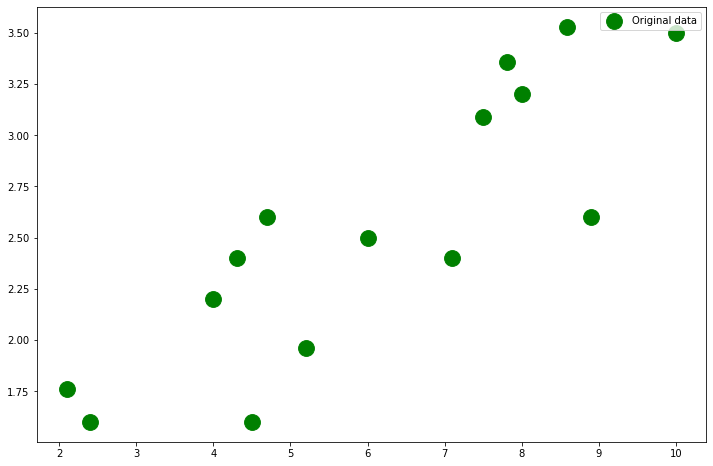

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [ ]:
# these are not the learnalble parameters of our model
# therefore requires_grad is False
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [ ]:
input_size = 1 
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [ ]:
# learnable parameters
# requires_grad is set to True
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [ ]:
b1 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [ ]:
w1

tensor([[0.7275]], requires_grad=True)

In [ ]:
b1

tensor([[0.9289]], requires_grad=True)

In [ ]:
# for loop for num of epochs

for iter in range(1,4000):
  # clamp func simulate relu func , which clamp any negative value to 0
  y_pred = X_train.mm(w1).clamp(min=0).add(b1)
  loss = (y_pred - Y_train).pow(2).sum()
  if iter % 100 == 0 :
    print(iter, loss.item())
  loss.backward()
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    b1 -= learning_rate * b1.grad
    w1.grad.zero_()
    b1.grad.zero_()


100 1.867870569229126
200 1.759618878364563
300 1.7087682485580444
400 1.684881329536438
500 1.673660397529602
600 1.6683894395828247
700 1.6659139394760132
800 1.664750099182129
900 1.6642038822174072
1000 1.6639474630355835
1100 1.6638269424438477
1200 1.6637704372406006
1300 1.6637437343597412
1400 1.663731336593628
1500 1.66372549533844
1600 1.6637221574783325
1700 1.6637212038040161
1800 1.663720965385437
1900 1.6637203693389893
2000 1.663719892501831
2100 1.663719654083252
2200 1.6637202501296997
2300 1.6637203693389893
2400 1.6637201309204102
2500 1.6637202501296997
2600 1.6637203693389893
2700 1.6637203693389893
2800 1.663719654083252
2900 1.663719654083252
3000 1.663719654083252
3100 1.663719654083252
3200 1.663719654083252
3300 1.663719654083252
3400 1.663719654083252
3500 1.663719654083252
3600 1.663719654083252
3700 1.663719654083252
3800 1.663719654083252
3900 1.663719654083252


In [ ]:
print('w1:', w1)
print('b1:', b1)

w1: tensor([[0.2355]], requires_grad=True)
b1: tensor([[1.1227]], requires_grad=True)


In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [ ]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[2.2296],
        [1.6879],
        [2.8890],
        [2.7948],
        [2.1354],
        [2.9634],
        [3.2187],
        [2.3474],
        [3.1457],
        [1.6173],
        [3.0068],
        [3.4778],
        [2.1825],
        [2.5358],
        [2.0648]], grad_fn=<AddBackward0>)

In [ ]:
predicted = predicted_in_tensor.detach().numpy()

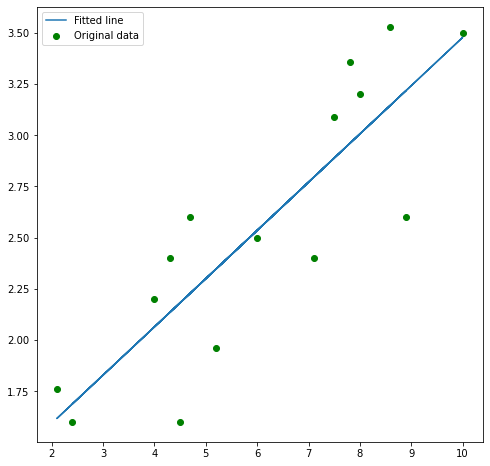

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# linear regression estimator in sklearn

import sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
reg = LinearRegression().fit(x_train, y_train)
print('w1 with sklearn is : ', reg.coef_)

w1 with sklearn is :  [[0.23550543]]


In [ ]:
print('b1 with sklearn is : ', reg.intercept_)

b1 with sklearn is :  [1.1227363]


In [ ]:
predicted = reg.predict(x_train)
predicted

array([[2.2296119],
       [1.6879494],
       [2.889027 ],
       [2.7948248],
       [2.1354098],
       [2.9634466],
       [3.2187347],
       [2.3473644],
       [3.145728 ],
       [1.6172976],
       [3.0067797],
       [3.4777908],
       [2.1825109],
       [2.535769 ],
       [2.064758 ]], dtype=float32)

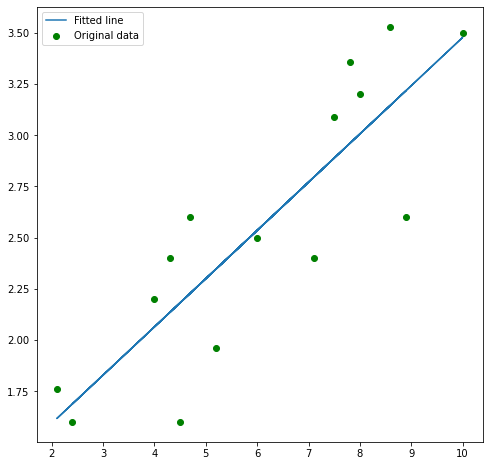

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

#overfitting

In [ ]:
# regularization


In [ ]:
alpha = 0.8

In [ ]:
# for loop for num of epochs

for iter in range(1,4000):
  # clamp func simulate relu func , which clamp any negative value to 0
  y_pred = X_train.mm(w1).add(b1)
  ridge_regularization_penalty = (w1*w1)
  loss = ((y_pred - Y_train).pow(2).sum()) + (alpha + ridge_regularization_penalty)
  if iter % 100 == 0 :
    print(iter, loss.item())
  loss.backward()
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    b1 -= learning_rate * b1.grad
    w1.grad.zero_()
    b1.grad.zero_()


100 2.5883803367614746
200 2.551064968109131
300 2.5336785316467285
400 2.5255775451660156
500 2.5218029022216797
600 2.5200443267822266
700 2.5192246437072754
800 2.518843173980713
900 2.518665313720703
1000 2.518582582473755
1100 2.5185437202453613
1200 2.5185258388519287
1300 2.51851749420166
1400 2.5185129642486572
1500 2.518512010574341
1600 2.5185112953186035
1700 2.518510341644287
1800 2.518510341644287
1900 2.518510341644287
2000 2.518510103225708
2100 2.518510580062866
2200 2.518510580062866
2300 2.518510103225708
2400 2.518510103225708
2500 2.518510341644287
2600 2.518510103225708
2700 2.518510103225708
2800 2.518510103225708
2900 2.518510103225708
3000 2.518510103225708
3100 2.518510103225708
3200 2.518510103225708
3300 2.518510103225708
3400 2.518510103225708
3500 2.518510103225708
3600 2.518510103225708
3700 2.518510103225708
3800 2.518510103225708
3900 2.518510103225708


In [ ]:
print('w1:', w1)
print('b1:', b1)

w1: tensor([[0.2327]], requires_grad=True)
b1: tensor([[1.1401]], requires_grad=True)


In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [ ]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[2.2335],
        [1.6984],
        [2.8850],
        [2.7919],
        [2.1405],
        [2.9585],
        [3.2107],
        [2.3499],
        [3.1385],
        [1.6286],
        [3.0013],
        [3.4666],
        [2.1870],
        [2.5360],
        [2.0707]], grad_fn=<AddBackward0>)

In [ ]:
predicted = predicted_in_tensor.detach().numpy()

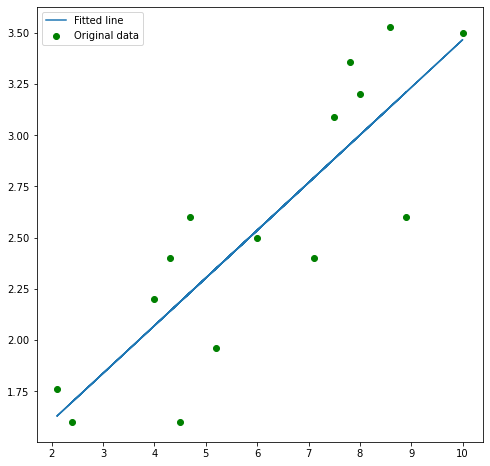

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# ridge regression performed using sklearn

from sklearn.linear_model import Ridge
ridge_model = Ridge()

In [ ]:
ridge_model.fit(X_train, Y_train)
print('w1 with sklearn is : ', ridge_model.coef_)

w1 with sklearn is :  [[0.23264857]]


In [ ]:
print('b1 with sklearn is: ', ridge_model.intercept_)

b1 with sklearn is:  [1.14008799]


# Regression model using pytorch

In [ ]:
'''# pytorch oprtimizers
# to calculate gradients and update model parameters
# 1st construct an optimizer object and pass iterable of all paramneterss
# which shld be learnable tensors

# can specify options per paramter basis, but its an advance option
# therfore we pass in an iterable of dict objects, each key is a parameter,
#  which defines the paramter group

# then make forward pass, compare predicted and actual values, 
# calc loss, n call .backward() on loss, which invoke autograd lib,
#  which gives gradients for all model parameters

# invoke optimizer.step() , optimizer will use calc. gradients  to update weights


# host of optimizers
torch.optim.Optimizer
torch.optim.Adadelta
torch.optim.Adagrad
torch.optim.Adam
etc

# basic sgd optimizer : moves gradients in the direction of reducing gradients
# momentum based vector


'''


In [ ]:
import torch , torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

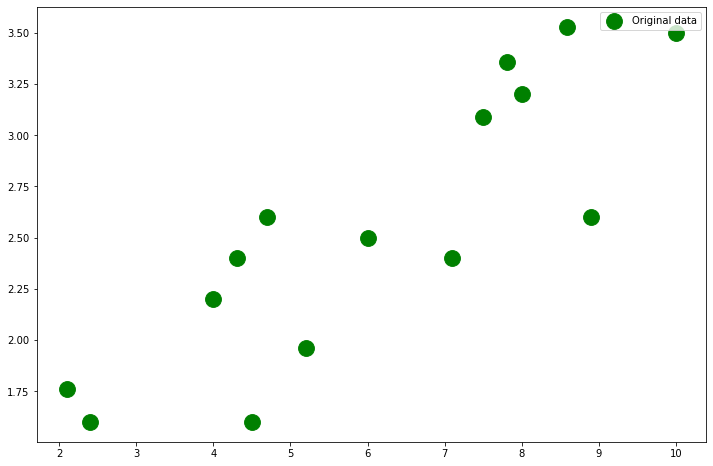

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [ ]:
# these are not the learnalble parameters of our model
# therefore requires_grad is False
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [ ]:
# learnable parameters
# requires_grad is set to True
w1 = torch.rand(input_size, 
                hidden_size, 
                
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [ ]:
b1 = torch.rand(hidden_size, 
                output_size, 
                
                requires_grad=True)
b1.shape

torch.Size([1, 1])

In [ ]:
input = 1 
hidden = 5
output = 1
# learning_rate = 0.001

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(input, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, output)

)

In [ ]:
loss_func = torch.nn.MSELoss(reduction= 'sum')

In [ ]:
X_train.size()

torch.Size([15, 1])

In [ ]:
# setting up training
learning_rate = 1e-4
for i in range(500):
  # invoking model and passing data x
  y_pred = model(X_train)
  # loss calc
  loss = loss_func(y_pred, Y_train)
  print(i , loss.item())
  # zeroout the gradients to calc fresh grads
  model.zero_grad()
  # invoke .backward to calc fresh grads wrt loss
  loss.backward()
  # turn off grad calc n update paramters
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad



0 96.55181884765625
1 88.8846435546875
2 81.89847564697266
3 75.4895248413086
4 69.56874084472656
5 64.05728912353516
6 58.904415130615234
7 54.07339859008789
8 49.5452995300293
9 45.290000915527344
10 41.29397201538086
11 37.54774475097656
12 34.04591751098633
13 30.787691116333008
14 27.761783599853516
15 24.963863372802734
16 22.389564514160156
17 20.033117294311523
18 17.886703491210938
19 15.942268371582031
20 14.19055461883545
21 12.621551513671875
22 11.225086212158203
23 9.987675666809082
24 8.897067070007324
25 7.940834045410156
26 7.106634616851807
27 6.382397651672363
28 5.756520748138428
29 5.2180023193359375
30 4.756565093994141
31 4.362709045410156
32 4.027759075164795
33 3.7438626289367676
34 3.5039937496185303
35 3.301910161972046
36 3.132108688354492
37 2.989774465560913
38 2.8707234859466553
39 2.7713398933410645
40 2.688514471054077
41 2.619590997695923
42 2.5623042583465576
43 2.5147368907928467
44 2.475269079208374
45 2.4425435066223145
46 2.4156064987182617
47 2.3

In [ ]:
predicted_in_tensor = model(X_train)
predicted_in_tensor

tensor([[2.0950],
        [1.4005],
        [2.9293],
        [2.8101],
        [1.9758],
        [3.0235],
        [3.3465],
        [2.2440],
        [3.2541],
        [1.3037],
        [3.0783],
        [3.6743],
        [2.0354],
        [2.4824],
        [1.8864]], grad_fn=<AddmmBackward>)

In [ ]:
# detach tensor from comp graph and convert it into a numpy array
predicted = predicted_in_tensor.detach().numpy()

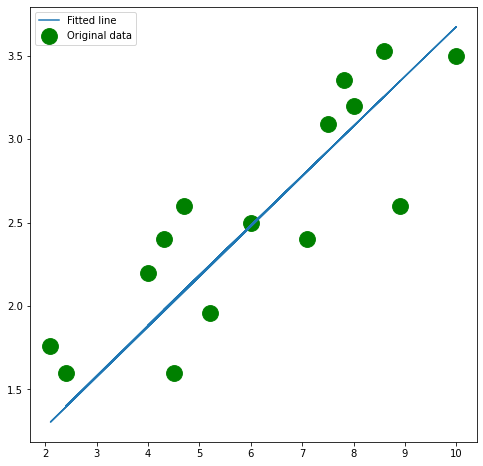

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# the weight updation is repetative process and pytorch does 
# automate it using optimizers

model = torch.nn.Sequential(
    torch.nn.Linear(input, hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden, output)
)
loss_fn = torch.nn.MSELoss(reduction = 'sum')


In [ ]:
# training
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
for i in range(500):
  # forward pass
  y_pred = model(X_train)
  # calc loss
  loss = loss_fn(y_pred, Y_train)
  print(i, loss.item())
  # zero out the gradients
  optimizer.zero_grad()
  # calc fresh grads
  loss.backward()
  # update weights using fresh grads
  optimizer.step()

0 230.25387573242188
1 188.706787109375
2 157.23670959472656
3 132.47683715820312
4 112.42581176757812
5 95.83102416992188
6 81.87542724609375
7 70.0068588256836
8 59.83946228027344
9 51.094337463378906
10 43.56222915649414
11 37.07988357543945
12 31.514638900756836
13 26.754541397094727
14 22.702129364013672
15 19.270557403564453
16 16.381412506103516
17 13.963458061218262
18 11.952034950256348
19 10.288750648498535
20 8.921313285827637
21 7.80332088470459
22 6.894052982330322
23 6.158159255981445
24 5.565266132354736
25 5.089560031890869
26 4.709293365478516
27 4.4063262939453125
28 4.165638446807861
29 3.9748973846435547
30 3.8240408897399902
31 3.7049100399017334
32 3.6109302043914795
33 3.5368242263793945
34 3.4783823490142822
35 3.4322516918182373
36 3.395779609680176
37 3.3668665885925293
38 3.343862295150757
39 3.325467586517334
40 3.3106656074523926
41 3.2986598014831543
42 3.2888283729553223
43 3.2806854248046875
44 3.2738540172576904
45 3.268040180206299
46 3.263014554977417

In [ ]:
predicted_in_tensor = model(X_train)
predicted_in_tensor

tensor([[2.0178],
        [1.2619],
        [2.9380],
        [2.8065],
        [1.8863],
        [3.0418],
        [3.3981],
        [2.1821],
        [3.2962],
        [1.1633],
        [3.1023],
        [3.7596],
        [1.9520],
        [2.4450],
        [1.7877]], grad_fn=<AddmmBackward>)

In [ ]:
predicted = predicted_in_tensor.detach().numpy()

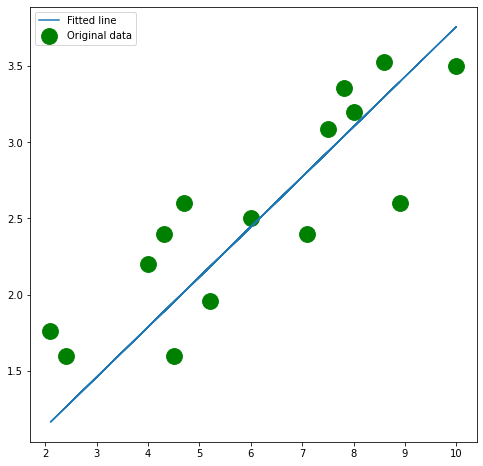

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# to reduce overfitting 
'''
regularization - penalise complex models
cross-validation - distint training and validation phases
dropout - intentionally turn off some neurons during training
'''

# dropout- in diff training iterations/steps diff neurons are turned off
# in effect each training step builds a diff network config
# ie comp graph look diff in each training step

# dense NN : fully connected nn
# dropt out: simpler nn, and active neuron learn significant features 
# dropout and turning off of neurons is only during the training phase of nn

# fcnn is used in testing



In [ ]:
'''# gradient descent and batches
# huge data and cant be feeded into nn in one go
# therefore batches are used to feed data

# epoch - one pass through entire training data is one epoch

# huge data, cannot feed in data in one epoch
# use subset of data in each iteration called batch of training data
# to train data for one epoch, need to pass in multiple batches of training data

# with each epoch of training , we move closer to the least mse value
# ie one step down the slope

batch_size - hyperparameter

1 data point at a time: SGD
few data point at a time : mini batch GD
entire data at a time - batch GD, 1 batch = 1 epoch
'''



#building a regression model for demand prediction

In [ ]:
# regression using fully connected dnn
!pip install hiddenlayer

In [ ]:
import graphviz
import torch
import hiddenlayer as hl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# dataset on kaggle.com
data = pd.read_csv('./train.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB


In [ ]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
def my_graph():

  plt.figure(figsize=(8, 6))

  sns.barplot('workingday', 'count', hue = 'season', data = data, ci=None)

  plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5))

  plt.xlabel('working day')
  plt.ylabel('Total number of bikes rented on working day')

  plt.title('Number of bikes rented per season')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


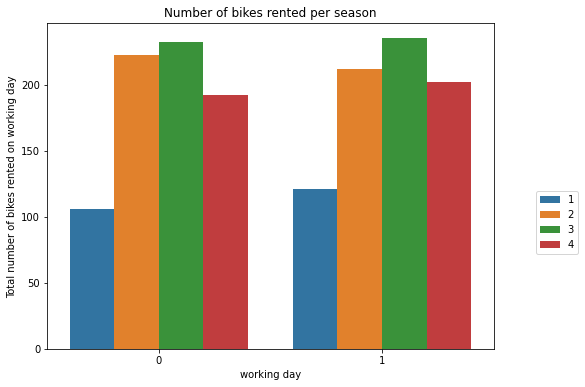

In [ ]:
my_graph()

Text(0, 0.5, 'Total number of bikes rented')

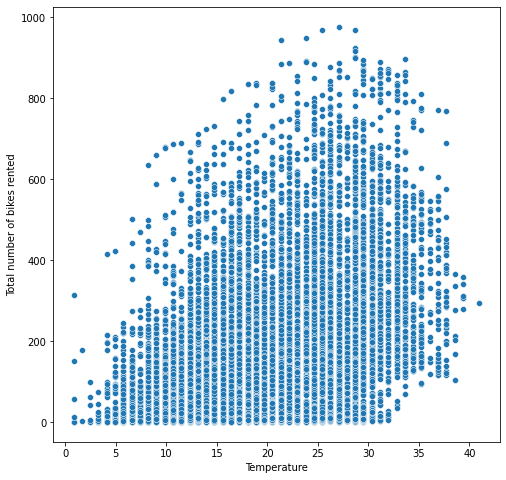

In [ ]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'temp', y = 'count', data = data)

plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

In [ ]:
# categorical data to numeric: ohe
data = pd.get_dummies(data, columns=['season'])
data.sample(5)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2012-08-11 18:00:00,0,0,2,28.70,33.335,74,19.9995,107,193,300,0,0,1,0
2012-02-11 20:00:00,0,0,2,6.56,6.060,43,36.9974,1,62,63,1,0,0,0
2011-11-07 09:00:00,0,1,2,13.94,16.665,100,8.9981,18,156,174,0,0,0,1
2011-06-17 23:00:00,0,1,1,25.42,28.790,83,8.9981,37,141,178,0,1,0,0
2011-06-11 21:00:00,0,0,1,27.06,31.060,74,15.0013,76,144,220,0,1,0,0


In [ ]:
columns = ['registered', 'workingday', 
           'weather', 'temp', 'atemp',
           'season_1', 'season_2', 
           'season_3', 'season_4']


features = data[columns]

In [ ]:
target = data['count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [ ]:
X_train_tensor.shape

torch.Size([8708, 9])

In [ ]:
Y_train_tensor.shape

torch.Size([8708])

In [ ]:
# batch your data using data.utils
import torch.utils.data as data_utils 

In [ ]:
# represent your data as a dataset 
# no. of kinds of datasets pytorch supports, 
# TensorDataset is used along with data loaders , which can load multiple samples in parallel

train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [ ]:
train_loader = data_utils.DataLoader(train_data, batch_size=1000, shuffle=True)

In [ ]:
# no of batches dataset is divided into
len(train_loader)

9

In [ ]:
# use python iterator to iterate through the betches
features_batch , target_batch = iter(train_loader).next()

In [ ]:
features_batch.shape

torch.Size([1000, 9])

In [ ]:
target_batch.shape

torch.Size([1000])

In [ ]:
inp = X_train_tensor.shape[1]
out = 1
hid = 10
lose_fn = torch.nn.MSELoss()

In [ ]:
# model 1
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Linear(hid, out))
# using hiddenlayer to viz this nn
hl.build_graph(model, torch.zeros([10,inp]))

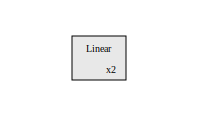

In [ ]:
# using hiddenlayer to viz this nn
hl.build_graph(model, torch.zeros([10,inp]))

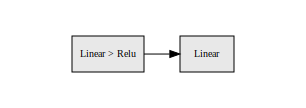

In [ ]:
#  model 2
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hid, out))
# using hiddenlayer to viz this nn
hl.build_graph(model, torch.zeros([10,inp]))

In [ ]:
# model 3
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p=0.2),
                            torch.nn.Linear(hid, out))


/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_helper.py:680: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to training  mode. The model will be exported in inference, as specified by the export mode.
  training_mode + ", as specified by the export mode.")


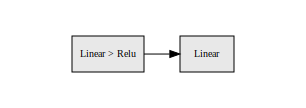

In [ ]:
# using hiddenlayer to viz this nn
hl.build_graph(model, torch.zeros([10,inp]))

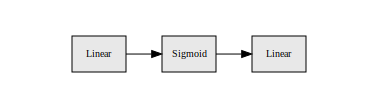

In [ ]:
#  model 4
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid, out))
# using hiddenlayer to viz this nn
hl.build_graph(model, torch.zeros([10,inp]))

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
loss_fn = torch.nn.MSELoss()

In [ ]:
total_step = len(train_loader)

num_epochs = 100

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([708])) that is different to the input size (torch.Size([708, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100], Step [1/9], Loss: 69273.4531
Epoch [1/100], Step [2/9], Loss: 71347.0781
Epoch [1/100], Step [3/9], Loss: 70308.3281
Epoch [1/100], Step [4/9], Loss: 66351.8047
Epoch [1/100], Step [5/9], Loss: 67058.8672
Epoch [1/100], Step [6/9], Loss: 76929.1797
Epoch [1/100], Step [7/9], Loss: 73395.0781
Epoch [1/100], Step [8/9], Loss: 65560.4609
Epoch [1/100], Step [9/9], Loss: 64276.8438
Epoch [21/100], Step [1/9], Loss: 79110.4688
Epoch [21/100], Step [2/9], Loss: 62961.7461
Epoch [21/100], Step [3/9], Loss: 66017.4062
Epoch [21/100], Step [4/9], Loss: 65152.8359
Epoch [21/100], Step [5/9], Loss: 70934.4844
Epoch [21/100], Step [6/9], Loss: 65737.3828
Epoch [21/100], Step [7/9], Loss: 68339.1484
Epoch [21/100], Step [8/9], Loss: 66486.1016
Epoch [21/100], Step [9/9], Loss: 77232.5156
Epoch [41/100], Step [1/9], Loss: 70510.2891
Epoch [41/100], Step [2/9], Loss: 66432.8516
Epoch [41/100], Step [3/9], Loss: 66969.7031
Epoch [41/100], Step [4/9], Loss: 68934.4688
Epoch [41/100], Ste

In [ ]:
# before using nn for prediction,
# switch to eval mode
# coz dropout n batch normalization layers have different modes for training and evaluation 
model.eval()
with torch.no_grad():
  y_pred = model(x_test_tensor)

In [ ]:
# randomly chosen sample from dataset
sample = x_test.iloc[45]
sample

registered    127.00
workingday      1.00
weather         1.00
temp           25.42
atemp          28.03
season_1        0.00
season_2        1.00
season_3        0.00
season_4        0.00
Name: 2011-06-17 22:00:00, dtype: float64

In [ ]:
# convert the numpy array sample to tensor
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)
sample_tensor

tensor([127.0000,   1.0000,   1.0000,  25.4200,  28.0300,   0.0000,   1.0000,
          0.0000,   0.0000])

In [ ]:
# prediction for this day
with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[45]))

Predicted count :  7.689108371734619
Actual count :  175


In [ ]:
# prediction for whole test data
y_pred_tensor = model(x_test_tensor)

In [ ]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(2178, 1)

In [ ]:
y_test.values.shape

(2178,)

In [ ]:
# comparing side by side
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values),
                          'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
1565,150,7.689025
506,96,7.689106
594,64,7.689047
2038,300,7.689108
1192,302,7.689108
1955,34,7.688955
1397,173,7.689106
659,23,7.687671
987,3,7.688546
1739,3,7.668892


In [ ]:
# evaluating regression model using r2 score

# how much of the variance in the underlying data is captured by the regression model
# higher r2 better the model
sklearn.metrics.r2_score(y_test, y_pred)



-1.0566176376476033

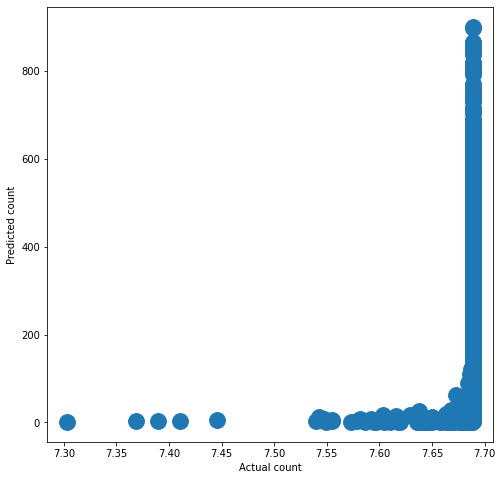

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test.values, s=250)

plt.xlabel("Actual count")
plt.ylabel("Predicted count")

plt.show()

#classification model using pytorch

In [ ]:
# descrete categorical values
# final output layer: sofmax layer
#  objective func : cross entropy loss
# alternative to softmax ... LogSoftmax nad negative log likelihood loss
# which have certain advantages



In [ ]:
# softmax : output are probability scores
# n category classification
# loss fun or objective fn
# cross entropy loss :measure of how diff 2 probability distributions are
loss cross entropy means thee labels of two series, y actual n y pred are in sync


In [ ]:
# linear classification as optimization problem
# obfn is min cross entropy btw y actual n y pred
# express relationship as exponential one
# find best values of w
'''
choices of output layer in pytorch
  softmax                              log softmax
slightly less stable                  slightly more stable, has nicer properties
cross entropy  loss fn                negative log likelihood  as lossfn
   both have to min cross entropy
1 output layer                          might need additional ouputlayer to calc log
                                           but in pytorch just use LogSoftMax
                                        tend to perform better  in real life in training

both are equivalent

In [ ]:
'''classification models are evaluated using 
accuracy precision recall
confusion matrix to understand them

precision: accuracy when classifier flags cancer
recall : accuracy when cancer actually present


In [ ]:
# classification using custom nn model



In [ ]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# the chance of admit is numeric value, we will convert it into buckets , low medium or high
data.shape

(400, 9)

In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 
             'University Rating', 'SOP', 
             'LOR ', 'CGPA', 'Research', 
             'Admit_Probability']]

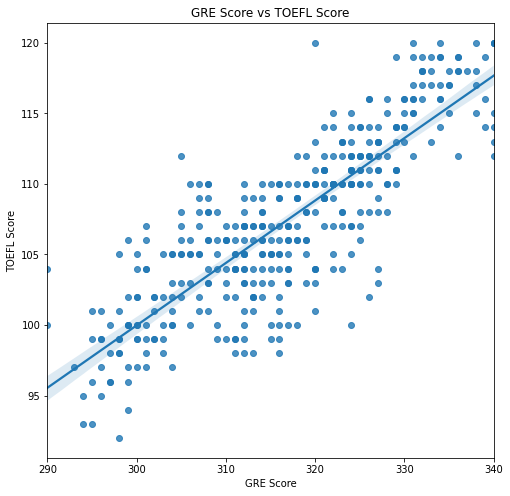

In [ ]:
plt.figure(figsize=(8, 8))
# scatter plot with reg line
fig = sns.regplot( x ="GRE Score", y = "TOEFL Score", data = data)
plt.title("GRE Score vs TOEFL Score")

plt.show()

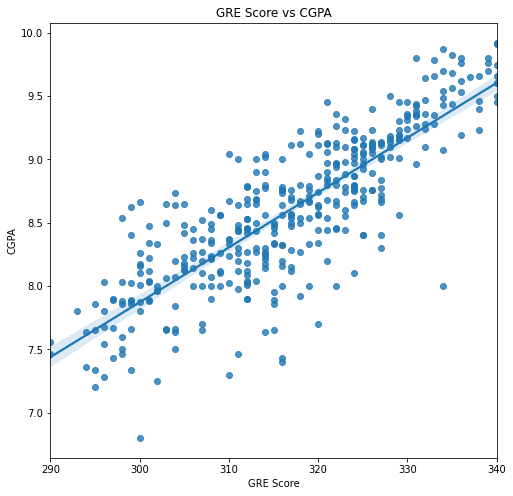

In [ ]:
plt.figure(figsize=(8, 8))

fig = sns.regplot(x = 'GRE Score', y = 'CGPA', data = data)
plt.title("GRE Score vs CGPA")

plt.show()

Text(0, 0.5, 'CGPA')

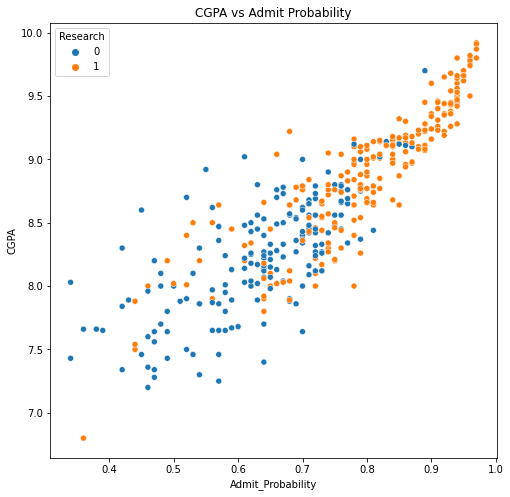

In [ ]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'Admit_Probability', y = 'CGPA', data = data, hue = 'Research')

plt.title("CGPA vs Admit Probability")

plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

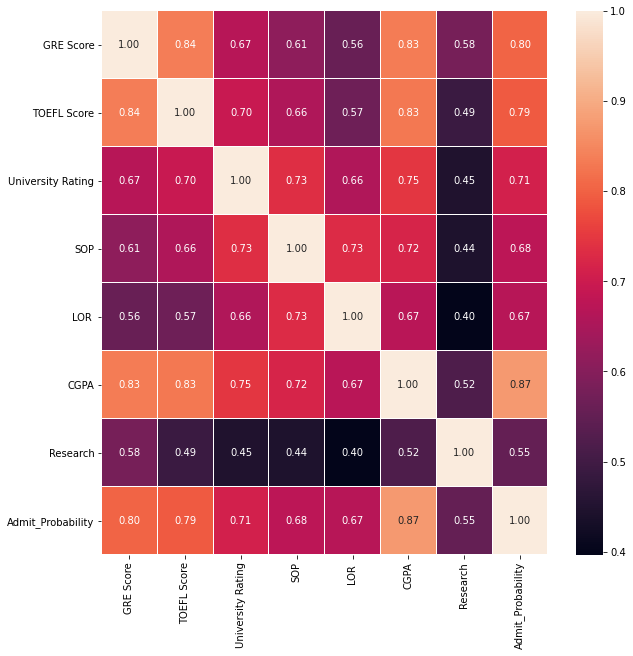

In [ ]:
# correlations btw each pair of variable
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

In [ ]:
# preprocessing
from sklearn import preprocessing

In [ ]:
# standardizing the numeric data to have zero mean and unit variance
# its performed using scale fun , ehich subtracts the mean and divide by std 
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA' ]] = \
                preprocessing.scale(data[['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']])

In [ ]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
360,0.453126,0.427257,3,0.596653,1.724515,0.068967,1,0.85
288,-0.244998,-0.562528,4,1.591075,1.724515,0.707010,0,0.82
189,0.627656,0.757186,5,1.591075,1.724515,0.807754,1,0.88
71,1.674841,0.757186,5,1.591075,1.724515,1.949515,1,0.96
399,1.413045,1.582006,4,1.591075,0.610127,1.781609,1,0.95
1,0.627656,-0.067635,4,0.596653,1.167321,0.455151,1,0.76
63,-0.157732,-0.067635,2,0.596653,-0.504260,-0.166101,1,0.56
227,-0.419528,0.427257,2,0.099442,-0.504260,-0.115729,0,0.64
343,-1.030386,-0.727492,2,-0.894980,0.052933,-0.787353,0,0.59
357,-1.379448,-0.562528,2,0.099442,0.052933,-1.190328,1,0.68


In [ ]:
col = ['GRE Score','TOEFL Score', 'SOP', 'LOR ', 'CGPA']

features = data[col]

In [ ]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [ ]:
target = data[['Admit_Probability']]

In [ ]:
target.head()
# its continuous numeric data 
# therefore need to bucketize it to make it categorical

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
# make a copy
y = target.copy()

In [ ]:
y.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
# y.replace(to_replace = target[target >= 0.80], value= int(2), inplace=True)
# y.replace(to_replace = target[target >= 0.60], value = int(1), inplace=True)
# y.replace(to_replace = target[target < 0.60], value = int(0), inplace=True)

In [ ]:
# df.loc[df.my_channel > 20000, 'my_channel'] = 0
# df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
# y[(y['Admit_Probability'] >= 0.6) & (y['Admit_Probability'] < 0.8)] = 1

In [ ]:
y.Admit_Probability[y['Admit_Probability'] >= 0.80] = 2
y.Admit_Probability[y['Admit_Probability'] < 0.60] = 0
y.Admit_Probability[(y['Admit_Probability'] >= 0.6) & (y['Admit_Probability'] < 0.8)] = 1


In [ ]:
y.head()

,Admit_Probability
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


In [ ]:
y['Admit_Probability'].unique()

array([2., 1., 0.])

In [ ]:
target = y

In [ ]:
target['Admit_Probability'].unique()

array([2., 1., 0.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the preprocessed data
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

In [ ]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()
Xtrain.shape

torch.Size([320, 5])

In [ ]:
Y_train.shape
# 2d arrays with inner dim 1, these can b converted into 1 dim

(320, 1)

In [ ]:
# convert thm to 1d while making them tensors
Ytrain = torch.from_numpy(Y_train.values).view(1,-1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1,-1)[0].long()

In [ ]:
Ytrain.shape

torch.Size([320])

In [ ]:
# design nn
import torch.nn as nn 
import torch.nn.functional as F
# instead of sequential container and builtin layers of pytorch framework
# which is used when we have straight forward model.
# we will design our own custom nn layers using torch.nn.functional API
# this gives us more granular control over layer design


In [ ]:
# input size is no of features in training data
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())


In [ ]:
# building custom nn
# we will create a class called Net, which will inherit from nn.Module class
# all of the nn in pytorch inherits from this nn.Module base class
class Net(nn.Module):
  def __init__(self, hidden_size, activation_fn = 'relu', apply_dropout = False):
    super(Net, self).__init__()
    # full connceted linear layers, will be applied to input one by one
    # after passing through an activation func, will be input to another layer
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)

    # initilize hidden layer size and activation func to member variable sof the class

    self.hidden_size = hidden_size
    self.activation_fn = activation_fn

    # setting dropout to none, makes dropout as false by default
    self.dropout = None
    # if dropout is true , set it to class variable
    if apply_dropout:
      self.dropout = nn.Dropout(0.2)

      # functional api allows us to specify in a very granular manner
      # how we want the layers of our nn to apply to our input in the forward pass
  # we can define exact connection btw the layers in forward func of nn

  # input to forward fn is x input, which is passed as parameter
  def forward(self, x):
    activation_fn = None

    # kind of activation fn we want to apply to linear layers
    if self.activation_fn == 'sigmoid':
      activation_fn = F.torch.sigmoid
    elif self.activation_fn == 'tanh':
      activation_fn = F.torch.tanh
    elif self.activation_fn == 'relu':
      activation_fn = F.torch.relu

    # passing the input x to fc linear layer and apply activation fn 
    # thn pass it further to next linear layer
    x = activation_fn(self.fc1(x))
    x = activation_fn(self.fc2(x))

    # applying dropout if specified, its applied to the output of last linear layer

    if self.dropout != None:
      x = self.dropout(x)
    # x then will be passed into another linear layer thats self.fc3

    x = self.fc3(x)

    # its output is passed into log_softmax func
    # calc log(SoftMAx()) - used in combination with NLLLoss() func

    return F.log_softmax(x, dim = -1)


In [ ]:
import torch.optim as optim

In [ ]:
# lets setup a little func called train_and_eval_model
# helper fun to train n eval our model
# input arg for the fun are model itself and lr 
def train_and_eval_model(model, learn_rate = 0.001):
  epoch_data = []
  epochs = 1001
  optimizer = optim.Adam(model.parameters(), lr = learn_rate)

  loss_fn = nn.NLLLoss()
  test_Accuracy = 0.0
  for epoch in range(1,epochs):
    optimizer.zero_grad()

    model.train()
    Ypred = model(Xtrain)
    loss = loss_fn(Ypred, Ytrain)
    loss.backward()
    optimizer.step()

    model.eval()
    Ypred_test = model(Xtest)
    loss_test = loss_fn(Ypred_test, Ytest)
    # finding which probability score is max
    _, pred = Ypred_test.data.max(1)
    # how many of the prediction were equal to actual y values
    # sum all correct predictions and divide by total predicted values
    test_accuracy = pred.eq( Ytest.data).sum().item()/y_test.values.size

    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])
    if epoch % 100 == 0:
      print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), test_accuracy))
            

  return {'model' : model,
            'epoch_data' : epoch_data, 
            'num_epochs' : epochs, 
            'optimizer' : optimizer, 
            'loss_fn' : loss_fn,
            'test_accuracy' : test_accuracy,
            '_, pred' : Ypred_test.data.max(1),
            'actual_test_label' : Ytest,
            }



In [ ]:
# building different nn architectures and evalueate them on test data

# invoking Net class to build nn architecture
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [ ]:
# invoking train_and_eval_model and store result in result_3_sig
result_3_sig = train_and_eval_model(net)

epoch - 100 (6%) train loss - 1.04 test loss - 1.03 Test accuracy - 0.5125
epoch - 200 (13%) train loss - 1.02 test loss - 1.03 Test accuracy - 0.5125
epoch - 300 (20%) train loss - 1.00 test loss - 1.02 Test accuracy - 0.5125
epoch - 400 (26%) train loss - 0.98 test loss - 1.01 Test accuracy - 0.5125
epoch - 500 (33%) train loss - 0.95 test loss - 0.98 Test accuracy - 0.5125
epoch - 600 (40%) train loss - 0.89 test loss - 0.93 Test accuracy - 0.6625
epoch - 700 (46%) train loss - 0.83 test loss - 0.88 Test accuracy - 0.6625
epoch - 800 (53%) train loss - 0.77 test loss - 0.83 Test accuracy - 0.6875
epoch - 900 (60%) train loss - 0.72 test loss - 0.78 Test accuracy - 0.7000
epoch - 1000 (66%) train loss - 0.68 test loss - 0.74 Test accuracy - 0.6875


In [ ]:
# model2
net = Net(3, 'sigmoid', True)
net 

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
result_3_sig_d = train_and_eval_model(net)

epoch - 100 (6%) train loss - 1.08 test loss - 1.05 Test accuracy - 0.5125
epoch - 200 (13%) train loss - 1.03 test loss - 1.02 Test accuracy - 0.5125
epoch - 300 (20%) train loss - 1.01 test loss - 1.01 Test accuracy - 0.5125
epoch - 400 (26%) train loss - 0.97 test loss - 0.99 Test accuracy - 0.5125
epoch - 500 (33%) train loss - 0.96 test loss - 0.97 Test accuracy - 0.5125
epoch - 600 (40%) train loss - 0.94 test loss - 0.94 Test accuracy - 0.6375
epoch - 700 (46%) train loss - 0.87 test loss - 0.90 Test accuracy - 0.6750
epoch - 800 (53%) train loss - 0.84 test loss - 0.86 Test accuracy - 0.6750
epoch - 900 (60%) train loss - 0.81 test loss - 0.82 Test accuracy - 0.6875
epoch - 1000 (66%) train loss - 0.76 test loss - 0.79 Test accuracy - 0.7000


In [ ]:
# model 3

net = Net(50, 'tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [ ]:
result_50_tanh = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.42 test loss - 0.55 Test accuracy - 0.7750
epoch - 200 (13%) train loss - 0.40 test loss - 0.55 Test accuracy - 0.8000
epoch - 300 (20%) train loss - 0.38 test loss - 0.54 Test accuracy - 0.8000
epoch - 400 (26%) train loss - 0.37 test loss - 0.53 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.36 test loss - 0.52 Test accuracy - 0.8000
epoch - 600 (40%) train loss - 0.34 test loss - 0.51 Test accuracy - 0.8000
epoch - 700 (46%) train loss - 0.32 test loss - 0.51 Test accuracy - 0.8125
epoch - 800 (53%) train loss - 0.29 test loss - 0.53 Test accuracy - 0.8125
epoch - 900 (60%) train loss - 0.25 test loss - 0.56 Test accuracy - 0.8125
epoch - 1000 (66%) train loss - 0.22 test loss - 0.59 Test accuracy - 0.8125


In [ ]:
# model 4
net = Net(1000, 'tanh')
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [ ]:
result_1000_tanh = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.33 test loss - 0.51 Test accuracy - 0.8125
epoch - 200 (13%) train loss - 0.13 test loss - 0.66 Test accuracy - 0.8000
epoch - 300 (20%) train loss - 0.04 test loss - 0.86 Test accuracy - 0.8000
epoch - 400 (26%) train loss - 0.01 test loss - 1.03 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.01 test loss - 1.14 Test accuracy - 0.8000
epoch - 600 (40%) train loss - 0.00 test loss - 1.23 Test accuracy - 0.8125
epoch - 700 (46%) train loss - 0.00 test loss - 1.29 Test accuracy - 0.8125
epoch - 800 (53%) train loss - 0.00 test loss - 1.35 Test accuracy - 0.8125
epoch - 900 (60%) train loss - 0.00 test loss - 1.39 Test accuracy - 0.8125
epoch - 1000 (66%) train loss - 0.00 test loss - 1.43 Test accuracy - 0.8125


In [ ]:
# model 5
net = Net(1000, 'tanh', True)
net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
result_1000_tanh_d = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.34 test loss - 0.52 Test accuracy - 0.8000
epoch - 200 (13%) train loss - 0.19 test loss - 0.65 Test accuracy - 0.8125
epoch - 300 (20%) train loss - 0.09 test loss - 0.85 Test accuracy - 0.7875
epoch - 400 (26%) train loss - 0.04 test loss - 0.96 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.02 test loss - 1.15 Test accuracy - 0.8000
epoch - 600 (40%) train loss - 0.01 test loss - 1.25 Test accuracy - 0.7875
epoch - 700 (46%) train loss - 0.01 test loss - 1.32 Test accuracy - 0.8000
epoch - 800 (53%) train loss - 0.01 test loss - 1.39 Test accuracy - 0.7875
epoch - 900 (60%) train loss - 0.00 test loss - 1.45 Test accuracy - 0.8000
epoch - 1000 (66%) train loss - 0.00 test loss - 1.48 Test accuracy - 0.8000


In [ ]:
# model 6
net =Net(100, 'sigmoid')
net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [ ]:
result_100_sig = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.49 test loss - 0.56 Test accuracy - 0.7750
epoch - 200 (13%) train loss - 0.43 test loss - 0.55 Test accuracy - 0.7750
epoch - 300 (20%) train loss - 0.41 test loss - 0.54 Test accuracy - 0.7625
epoch - 400 (26%) train loss - 0.40 test loss - 0.54 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.39 test loss - 0.54 Test accuracy - 0.8000
epoch - 600 (40%) train loss - 0.39 test loss - 0.54 Test accuracy - 0.8000
epoch - 700 (46%) train loss - 0.38 test loss - 0.55 Test accuracy - 0.7875
epoch - 800 (53%) train loss - 0.38 test loss - 0.55 Test accuracy - 0.7875
epoch - 900 (60%) train loss - 0.38 test loss - 0.56 Test accuracy - 0.7875
epoch - 1000 (66%) train loss - 0.37 test loss - 0.56 Test accuracy - 0.7875


In [ ]:
# model 7
net = Net(100, 'relu')
net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [ ]:
result_100_relu = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.36 test loss - 0.52 Test accuracy - 0.8000
epoch - 200 (13%) train loss - 0.30 test loss - 0.51 Test accuracy - 0.8125
epoch - 300 (20%) train loss - 0.22 test loss - 0.55 Test accuracy - 0.7875
epoch - 400 (26%) train loss - 0.13 test loss - 0.69 Test accuracy - 0.7500
epoch - 500 (33%) train loss - 0.08 test loss - 0.89 Test accuracy - 0.7625
epoch - 600 (40%) train loss - 0.04 test loss - 1.08 Test accuracy - 0.7500
epoch - 700 (46%) train loss - 0.03 test loss - 1.24 Test accuracy - 0.7500
epoch - 800 (53%) train loss - 0.02 test loss - 1.37 Test accuracy - 0.7500
epoch - 900 (60%) train loss - 0.01 test loss - 1.47 Test accuracy - 0.7500
epoch - 1000 (66%) train loss - 0.01 test loss - 1.58 Test accuracy - 0.7625


In [ ]:
# model 8 
net = Net(50, 'relu', True)
net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
result_50_relu_d = train_and_eval_model(net)

epoch - 100 (6%) train loss - 0.44 test loss - 0.51 Test accuracy - 0.7625
epoch - 200 (13%) train loss - 0.39 test loss - 0.52 Test accuracy - 0.7875
epoch - 300 (20%) train loss - 0.36 test loss - 0.53 Test accuracy - 0.7875
epoch - 400 (26%) train loss - 0.33 test loss - 0.53 Test accuracy - 0.7875
epoch - 500 (33%) train loss - 0.29 test loss - 0.54 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.28 test loss - 0.55 Test accuracy - 0.7875
epoch - 700 (46%) train loss - 0.24 test loss - 0.55 Test accuracy - 0.7750
epoch - 800 (53%) train loss - 0.23 test loss - 0.58 Test accuracy - 0.7750
epoch - 900 (60%) train loss - 0.20 test loss - 0.59 Test accuracy - 0.7750
epoch - 1000 (66%) train loss - 0.18 test loss - 0.62 Test accuracy - 0.7750


In [ ]:
# create a pd dataframe with the info we had recorded in the epoch data list
result_model = result_50_tanh

In [ ]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [ ]:
import matplotlib.pyplot as plt

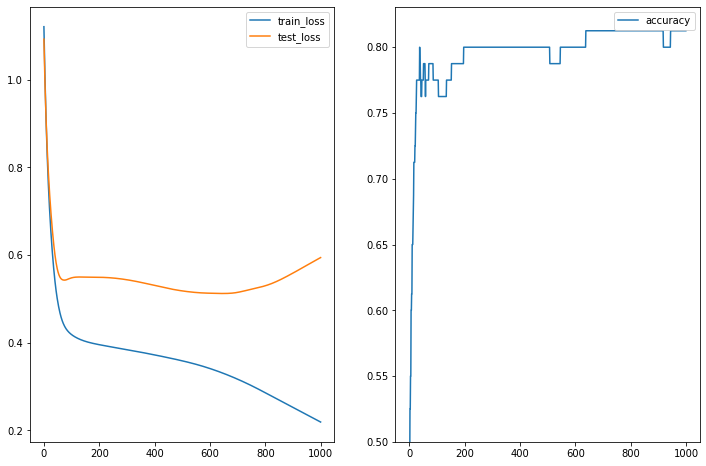

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()